In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
master_df = pd.read_csv(r'C:\Users\Shoya\Senseai\data\Traffic_Data.csv', encoding="ISO-8859-1")
                    
display(master_df.head())
display(master_df.columns)

,Date,Unique visitors,Visits,Users,Actions,Maximum actions in one visit,Bounces,Total time spent by visitors (in seconds),Conversions,Visits with Conversions,...,Actions by Returning Visits,Unique returning visitors,Returning Users,Maximum actions in one returning visit,nb_conversions_returning_visit,nb_visits_converted_returning_visit,revenue_returning_visit,conversion_rate_returning_visit,nb_hits_with_time_generation,Avg. generation time
0,4/4/2018,43,51,25,2551,262,6,146979,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4/5/2018,275,435,275,21699,1791,58,1682757,0,0,...,13143.0,15.0,15.0,1791.0,0.0,0.0,0.0,0%,NaN,NaN
2,4/6/2018,317,433,317,25238,2356,51,1564032,0,0,...,16909.0,14.0,14.0,2356.0,0.0,0.0,0.0,0%,NaN,NaN
3,4/7/2018,35,53,35,18651,2283,5,1179181,0,0,...,17347.0,12.0,12.0,2283.0,0.0,0.0,0.0,0%,NaN,NaN
4,4/8/2018,31,54,31,15204,2176,5,1108012,0,0,...,13381.0,12.0,12.0,2176.0,0.0,0.0,0.0,0%,NaN,NaN


Index(['Date', 'Unique visitors', 'Visits', 'Users', 'Actions',
       'Maximum actions in one visit', 'Bounces',
       'Total time spent by visitors (in seconds)', 'Conversions',
       'Visits with Conversions', 'Revenue', 'Conversion Rate',
       'nb_conversions_new_visit', 'nb_visits_converted_new_visit',
       'revenue_new_visit', 'conversion_rate_new_visit', 'Pageviews',
       'Unique Pageviews', 'Downloads', 'Unique Downloads', 'Outlinks',
       'Unique Outlinks', 'Searches', 'Unique Keywords', 'Bounce Rate',
       'Actions per Visit', 'Avg. Visit Duration (in seconds)',
       'Avg. Duration of a Returning Visit (in sec)',
       'Avg. Actions per Returning Visit', 'Bounce Rate for Returning Visits',
       'Returning Visits', 'Actions by Returning Visits',
       'Unique returning visitors', 'Returning Users',
       'Maximum actions in one returning visit',
       'nb_conversions_returning_visit', 'nb_visits_converted_returning_visit',
       'revenue_returning_visit', 

In [3]:
def convert_to_seconds(val):
    words = val.split()
    if (len(words) == 1 ):
        # format: only seconds 
        return int(val[:-1])
    elif ('hours' in words):
        # format: hours, min 
        return (int(words[0]) * 3600) + ( int(words[2]) * 60 )
    else:
        # format: min, seconds
        try:
            return ( int(words[0]) * 60 ) + ( int(words[-1][:-1]) )
        except:
            return None 
    
master_df['Avg. Visit Duration'] = master_df['Avg. Visit Duration (in seconds)'].apply(convert_to_seconds)

display(master_df['Avg. Visit Duration'].head(2))

0    2882
1    3840
Name: Avg. Visit Duration, dtype: int64

,Unique visitors,Visits,Users,Bounces,Total time spent by visitors (in seconds),Avg. Visit Duration
0,43,51,25,6,146979,2882
1,275,435,275,58,1682757,3840
2,317,433,317,51,1564032,3600
3,35,53,35,5,1179181,22200
4,31,54,31,5,1108012,20460


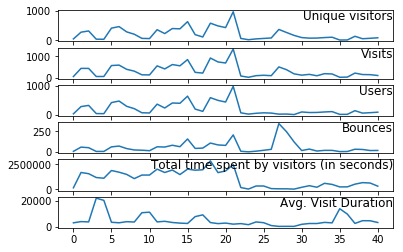

In [9]:
fig = plt.figure()

columns = ['Unique visitors', 'Visits', 'Users', 'Bounces', 'Total time spent by visitors (in seconds)','Avg. Visit Duration']

df = master_df[columns]
display(df.head())

i = 1 
for column in columns:
    ax = plt.subplot(len(columns), 1, i)
    plt.plot(df[column])
    plt.title(str(column), y=0.5, loc='right')
    i += 1 
plt.show()